In [ ]:
# 오전 수업
# GridSearchCV(좋은 파라미터 찾기 위해 사용) vs Cross Validation(해도되고 안해도 되지만, 교차 검증을 해주면 더 좋기 때문에!) 

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [5]:
digits = datasets.load_digits()

In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
digits.data[0] #이미지를 숫자로 표현해놓은것

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
knn = KNeighborsClassifier()

In [14]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [18]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [19]:
param_grid = {"n_neighbors" : range(1, 20)}

In [20]:
param_grid

{'n_neighbors': range(1, 20)}

In [23]:
len(digits.data)

1797

In [22]:
from sklearn.model_selection import GridSearchCV

In [25]:
# 좋은 파라미터를 찾기 위해 grid_model 사용
grid_model = GridSearchCV(knn, return_train_score = True, param_grid = param_grid, cv = 10, verbose = 3, scoring = 'f1') # verbose라는 용어는 IT에서 많이 사용한다.

In [26]:
grid_model.fit(digits.data, digits.target)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10] END n_neighbors=1;, score=(train=1.000, test=0.933) total time=   0.0s
[CV 2/10] END n_neighbors=1;, score=(train=1.000, test=0.994) total time=   0.0s
[CV 3/10] END n_neighbors=1;, score=(train=1.000, test=0.972) total time=   0.0s
[CV 4/10] END n_neighbors=1;, score=(train=1.000, test=0.972) total time=   0.0s
[CV 5/10] END n_neighbors=1;, score=(train=1.000, test=0.967) total time=   0.0s
[CV 6/10] END n_neighbors=1;, score=(train=1.000, test=0.983) total time=   0.0s
[CV 7/10] END n_neighbors=1;, score=(train=1.000, test=0.994) total time=   0.0s
[CV 8/10] END n_neighbors=1;, score=(train=1.000, test=0.989) total time=   0.0s
[CV 9/10] END n_neighbors=1;, score=(train=1.000, test=0.978) total time=   0.0s
[CV 10/10] END n_neighbors=1;, score=(train=1.000, test=0.966) total time=   0.0s
[CV 1/10] END n_neighbors=2;, score=(train=0.993, test=0.939) total time=   0.0s
[CV 2/10] END n_neighbors=2;, score=(train=0.

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=3)

In [34]:
grid_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [35]:
import pandas as pd

In [36]:
colnames = ['param_n_neighbors', 'mean_train_score', 'mean_test_score']

In [37]:
grid_df = pd.DataFrame(grid_model.cv_results_, columns = colnames)

In [38]:
grid_df.set_index('param_n_neighbors', inplace = True)

In [39]:
grid_df

,mean_train_score,mean_test_score
param_n_neighbors,,
1,1.000000,0.974963
2,0.990973,0.974407
3,0.993322,0.976633
4,0.991776,0.972182
5,0.990540,0.971074
6,0.989427,0.968290
7,0.990107,0.967734
8,0.988685,0.964944
9,0.987881,0.964944


In [41]:
grid_df.sort_values(['mean_test_score', 'mean_train_score'], ascending=False)

,mean_train_score,mean_test_score
param_n_neighbors,,
3,0.993322,0.976633
1,1.000000,0.974963
2,0.990973,0.974407
4,0.991776,0.972182
5,0.990540,0.971074
6,0.989427,0.968290
7,0.990107,0.967734
8,0.988685,0.964944
9,0.987881,0.964944


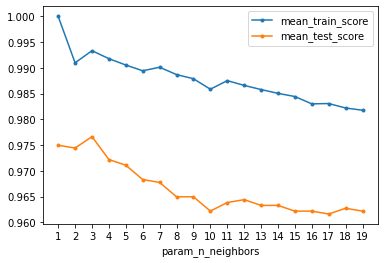

In [48]:
ax = grid_df.plot.line(marker = '.')
ax.set_xticks(grid_df.index);

In [49]:
grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [50]:
grid_model.best_score_

0.9766325263811299

In [51]:
grid_model.best_params_

{'n_neighbors': 3}

---

In [52]:
# 중첩 교차 검증을 하기 위해 이 작업을 한다?
from sklearn.model_selection import cross_val_score # cross validation score

In [53]:
grid_knn = GridSearchCV(knn, param_grid = param_grid, cv = 2)

In [54]:
outer_scores = cross_val_score(grid_knn, digits.data, digits.target, cv = 5)

In [55]:
outer_scores

array([0.96111111, 0.95277778, 0.96657382, 0.98607242, 0.96657382])

In [56]:
grid_knn.fit(digits.data, digits.target)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': range(1, 20)})

In [57]:
grid_knn.best_score_

0.9610455566813907

In [60]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [61]:
grid_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#가장 좋은 파라미터 값들만 넣어준 상태

In [62]:
preferred_params = grid_knn.best_estimator_.get_params()

In [63]:
final_knn = KNeighborsClassifier(**preferred_params)

In [64]:
final_knn.fit(digits.data, digits.target)

KNeighborsClassifier(n_neighbors=1)

In [65]:
final_knn.score(digits.data, digits.target)

1.0